# Punto 1

##  Obtenga los datos de todos los sismos ocurridos entre el 1 de Enero del 2010 y el día 5 de Diciembre del 2019, que tengan una magnitud mínima de 5 grados, en formato JSON (para efectos de la API, el formato a solicitar es el llamado “geojson”).mundo. Toda la documentación de la API en cuestión se encuentra en https://earthquake.usgs.gov/fdsnws/event/1/.

### Importación de librerias.

In [10]:
#Importamos librerias para API
import json
import urllib.request
import requests


#Formatear fecha
import datetime

#Normalizacion de datos json a dataframe pandas
from pandas.io.json import json_normalize

#Triada Clasica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importamos psycopg2 para trabajar sql en jupyter
import psycopg2


### Obtenga los datos de todos los sismos ocurridos entre el 1 de Enero del 2010 y el día 5 de Diciembre del 2019, que tengan una magnitud mínima de 5 grados, en formato JSON (para efectos de la API, el formato a solicitar es el llamado “geojson”).mundo. Toda la documentación de la API en cuestión se encuentra en https://earthquake.usgs.gov/fdsnws/event/1/.

Lo primero que haremos es revisar si obtenemos una respuesta favorable a los requerimientos de la pregunta. En este caso obtenemos una respuesta de valor 200, lo que significa que podemos obtener una respuesta favorable a nuestros requerimientos.

In [11]:
respuesta = requests.get('https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2010-01-01&endtime=2019-12-19&minmag=5.0')
print(respuesta)


<Response [200]>


Dado que obtuvimos una respuesta favorable a nuestra pregunta, ahora procederemos a la obtencion de un diccionario json con los datos solicitados en la pregunta y lo crearemos como una variable llamada "terremotos".

In [12]:
origen = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2010-01-01&endtime=2019-12-05&minmag=5.0"
respuesta = urllib.request.urlopen(origen)
terremotos = json.loads(respuesta.read())

# Punto 2


## A partir de la información disponible en el diccionario generado, construya un DataFrame que muestre los registros de cada uno de los sismos antes mencionados. 

A partir de nuestro diccionario json con los datos de terremotos, vamos a realizar una nueva variable llamada "sismos" la cual va a normalizarse en un dataframe, ya que trabajar directamente en un diccionario json se puede, este es muy engorroso porque si lo llevaramos directamente a dataframe, habrian columnas con columnas de datos anidadas en ellas, es por esto que json_normalize es muy bueno ya que nos ahorra esa tarea.

In [17]:
sismos= json_normalize(terremotos ["features"])

Ahora tenemos un dataframe llamado "sismos".

In [33]:
sismos.head()

,geometry.coordinates,geometry.type,id,properties.alert,properties.cdi,properties.code,properties.detail,properties.dmin,properties.felt,properties.gap,...,properties.status,properties.time,properties.title,properties.tsunami,properties.type,properties.types,properties.tz,properties.updated,properties.url,type
0,"[169.5628, -19.0515, 266]",Point,us60006m2j,green,2.7,60006m2j,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.812,1.0,21.0,...,reviewed,1575490203614,"M 6.0 - 63km NNE of Isangel, Vanuatu",0,earthquake,",dyfi,geoserve,ground-failure,losspager,moment...",660.0,1575589441300,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
1,"[70.8157, 36.4678, 142.52]",Point,us60006lwg,None,2.2,60006lwg,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.257,2.0,60.0,...,reviewed,1575449176621,"M 5.0 - 44km S of Jarm, Afghanistan",0,earthquake,",dyfi,geoserve,origin,phase-data,",270.0,1575451889499,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
2,"[140.4263, 36.8425, 26.94]",Point,us60006lu8,None,5.0,60006lu8,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.534,60.0,51.0,...,reviewed,1575423535815,"M 5.0 - 10km NE of Daigo, Japan",0,earthquake,",dyfi,geoserve,origin,phase-data,",540.0,1576462413257,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
3,"[147.9386, 43.3332, 8.69]",Point,us60006lt9,None,NaN,60006lt9,https://earthquake.usgs.gov/fdsnws/event/1/que...,3.763,NaN,88.0,...,reviewed,1575415506889,"M 5.2 - 111km ESE of Shikotan, Russia",0,earthquake,",geoserve,moment-tensor,origin,phase-data,",600.0,1576209161040,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
4,"[150.7785, -3.2101, 10]",Point,us60006lsm,green,NaN,60006lsm,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.691,NaN,37.0,...,reviewed,1575411792789,"M 5.6 - 70km S of Kavieng, Papua New Guinea",1,earthquake,",geoserve,losspager,moment-tensor,origin,phase...",600.0,1575498340020,https://earthquake.usgs.gov/earthquakes/eventp...,Feature


# Punto 3

## Gráfico de barras horizontal que entregue los 25 lugares con mayor frecuencia de sismos en la década. Explore formas de cómo truncar la cantidad de datos a los 25 con mayor frecuencia.

In [34]:
def grafico (df,colum,titulo):
    graf=df[colum].value_counts().head(25).sort_values()
    aa=plt.figure(figsize=(12,8))
    graf.plot(kind='barh')
    plt.title('La mayor cantidad de {0} en la Ultima decada'.format(titulo.upper()),fontsize=36, color='black')

    plt.xlabel('Numero de {0}'.format(titulo.upper()),fontsize=13, color='black')
    

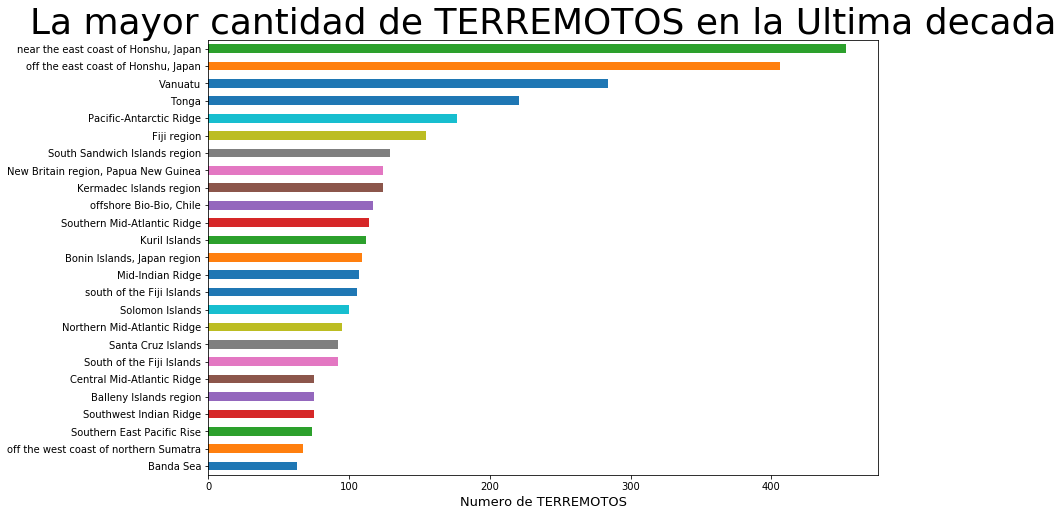

In [35]:
grafico (sismos,'properties.place',"terremotos")

La mayor cantidad de terremotos se han producido cerca o fuera de la costa de Honshu en Japón. Apesar que en Chile se han producido terremotos muy grandes como el de valvidia, en la lista solo aparece en el puesto 10 la region del biobio como una de la mayor cantidad de terremotos en la ultima decada, eso significa que en chile apesar d ela magnitud de los terremotos, estos no se dan con tanta frecuencia como en otros paises.

## Histograma que muestre la distribución de sismos entre 6 grados y el máximo observado. Explore cómo fijar los márgenes del gráfico para que no se muestren en el eje x valores menores a 6 grados)

In [36]:
#Genero una nueva variable para los sismos mayores a 6 grados
sismos6=sismos[sismos["properties.mag"]>=6]

In [37]:
def histograma(df,col,titulo,binss):
    maxi=df[col].max()
    plt.figure(figsize=(25,15))
    plt.title("GRAFICO DISTRIBUCION DE FRECUENCIA {0}".format(titulo.upper()),fontsize=36, color='black')
    plt.axvline(maxi, color='b', linestyle='--')
    df[col].plot(kind="hist", color='orange',log=False,bins=binss)

    return maxi

9.1

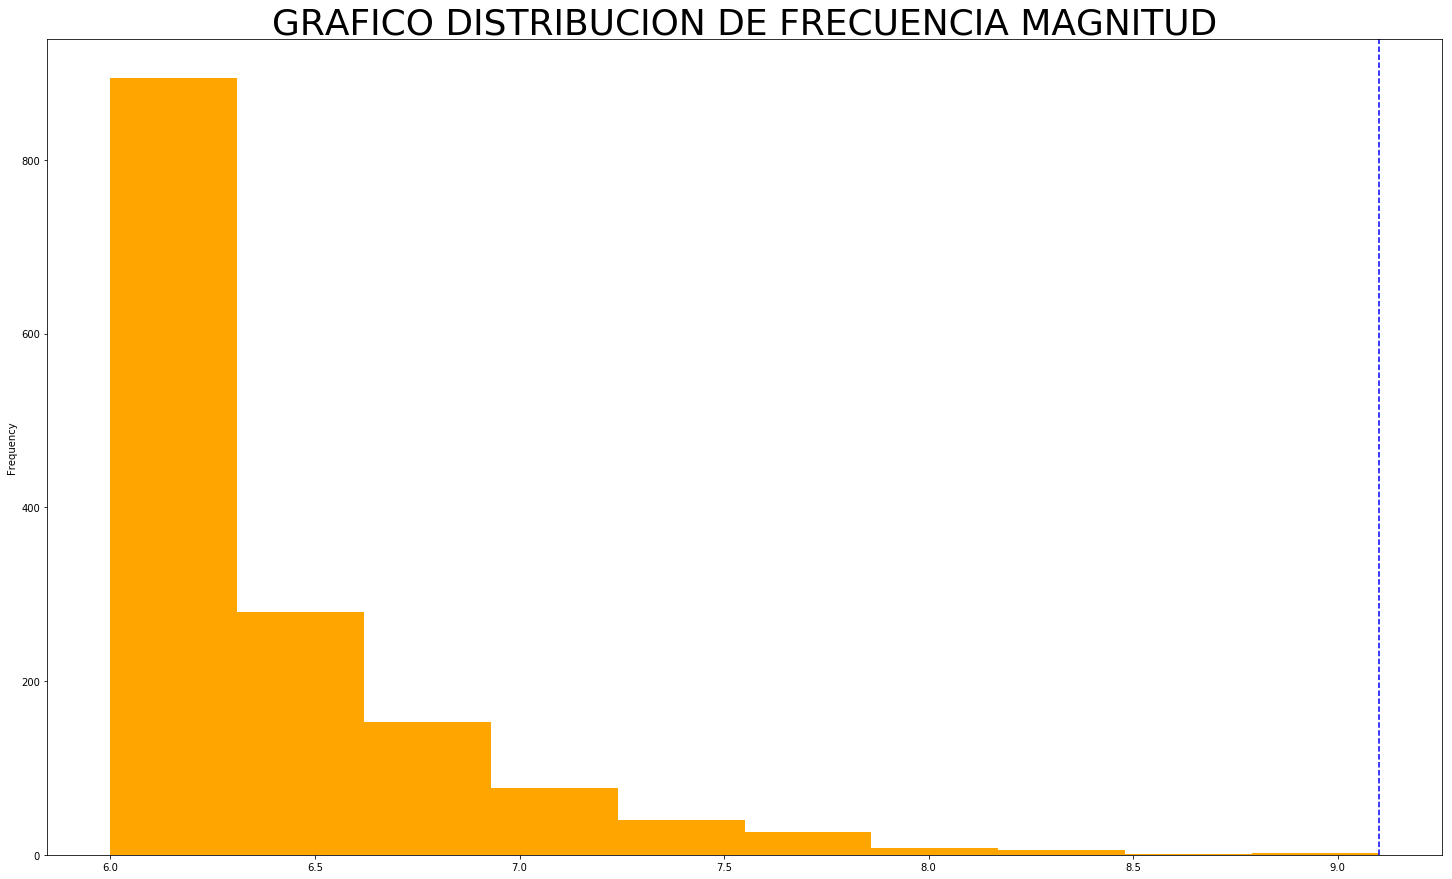

In [38]:
histograma (sismos6,"properties.mag", "Magnitud",10)

Segun el histograma la mayor cantidad de terremotos son los que tienen 6 grados con una frecuencia de aproximadamente 900 terremotos, luego se ve un decremento bastante grande con los 6.5 grados donde el numero de terremotos es menor a los 300, y asi bajan mientras mas alto sea el grado del terremoto. El terremoto mas grande registrado en la ultima decada es de 9.1 grados y se ve con la linea azul en el grafico.

## Generar un tercer gráfico que considere relevante para estos efectos, y explique las razones del porqué lo eligió

Este tercer grafico lo realizaré posterior al punto 5 ya que engo los datos mejor filtrados para este cometido.

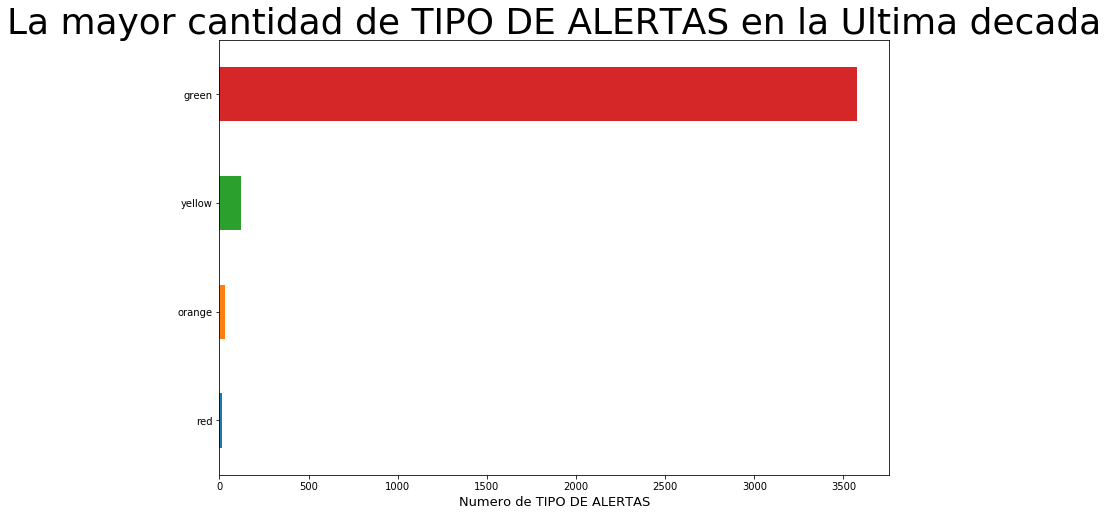

In [39]:
grafico(sismos,"properties.alert","Tipo de alertas")

En este grafico se muestran el nivel de las alertas de la Escala de impacto del terremoto de PAGER (https://www.usgs.gov/natural-hazards/earthquake-hazards/research). La mayor cantidad de alertas son las alertas son las verdes con alrrededor de 3500 alertas, en cambio las otras alertas son bastante pocas y podemos concluir que son bastante pocos los terremotos que tienen un impacto grave en el lugar donde ocurren. *** Además realice 3 graficos mas donde se puede ver los terremotos por hora, mes y año, estos lños realice posterior al punto 5***

# Punto 4


##  La columna “time” no está en formato “año/mes/dia hora/min/seg”. Para poder trabajar de mejor manera aquel dato, genere 6 nuevas columnas en el DataFrame, en la cual se guarden año, mes, dia, hora, min y seg de cada evento.

Lo que debemos hacer es ocupar la libreria "datetime" y un ciclo "For" para cambiar el formato de la fecha y poder obtenerlos separados cada dato en una columna para cada uno.

In [40]:
#Genera una lista del dataframe con cada uno de los datos de la columna properties.time del ciclo for con datetime. 
tiempo = []
for x in sismos["properties.time"]:
    when = datetime.datetime.fromtimestamp(
        x / 1000).strftime('%Y-%m-%d-%H-%M-%S-%d/%m/%Y-%M:%S%z')
    tiempo.append("{0}".format(when))

In [41]:
#pasamos la lista sobre escribiendola la variable a dataframe asignandole el nombre de la columna "Tiempo"
tiempo=pd.DataFrame(tiempo, columns={"Tiempo"})

En este momento tenemos una columna con los 6 datos y estos se encuentran separados por "-", ahora como necesitamos cada dato en una nueva columna, sobre escribimos la variable con la opción "split" indicando el separador "-" y con un "rename", renombrar cada una de las columnas. Además generé anteriormente dos nuevos datos para obtener 2 columnas mas, que son la fecha completa y la hora completa.

In [42]:
tiempo.head()

,Tiempo
0,2019-12-04-17-10-03-04/12/2019-10:03
1,2019-12-04-05-46-16-04/12/2019-46:16
2,2019-12-03-22-38-55-03/12/2019-38:55
3,2019-12-03-20-25-06-03/12/2019-25:06
4,2019-12-03-19-23-12-03/12/2019-23:12


Como podemos ver, es necesario separar los datos por cada "-" ya que no nos sirve de esta forma para poder trabajar los datos.

In [43]:
#Separa los datos de la columna tiempo por cada "-" y los almacena en columnas separadas
tiempo = tiempo['Tiempo'].str.split('-', 7, expand=True).rename(columns={
    0: "Año",
    1: "Mes",
    2: "Dia",
    3: "Hora",
    4: "Minuto",
    5: "Segundos",
    6: "Fecha",
    7: "Horatotal"
})

In [44]:
tiempo.head()

,Año,Mes,Dia,Hora,Minuto,Segundos,Fecha,Horatotal
0,2019,12,04,17,10,03,04/12/2019,10:03
1,2019,12,04,05,46,16,04/12/2019,46:16
2,2019,12,03,22,38,55,03/12/2019,38:55
3,2019,12,03,20,25,06,03/12/2019,25:06
4,2019,12,03,19,23,12,03/12/2019,23:12


In [45]:
#Para unir las columnas creadas de fechas y horas
sismos = pd.concat([sismos, tiempo], axis=1)
sismos.head()

,geometry.coordinates,geometry.type,id,properties.alert,properties.cdi,properties.code,properties.detail,properties.dmin,properties.felt,properties.gap,...,properties.url,type,Año,Mes,Dia,Hora,Minuto,Segundos,Fecha,Horatotal
0,"[169.5628, -19.0515, 266]",Point,us60006m2j,green,2.7,60006m2j,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.812,1.0,21.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Feature,2019,12,04,17,10,03,04/12/2019,10:03
1,"[70.8157, 36.4678, 142.52]",Point,us60006lwg,None,2.2,60006lwg,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.257,2.0,60.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Feature,2019,12,04,05,46,16,04/12/2019,46:16
2,"[140.4263, 36.8425, 26.94]",Point,us60006lu8,None,5.0,60006lu8,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.534,60.0,51.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Feature,2019,12,03,22,38,55,03/12/2019,38:55
3,"[147.9386, 43.3332, 8.69]",Point,us60006lt9,None,NaN,60006lt9,https://earthquake.usgs.gov/fdsnws/event/1/que...,3.763,NaN,88.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Feature,2019,12,03,20,25,06,03/12/2019,25:06
4,"[150.7785, -3.2101, 10]",Point,us60006lsm,green,NaN,60006lsm,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.691,NaN,37.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Feature,2019,12,03,19,23,12,03/12/2019,23:12


# Punto 5

## Construya dos nuevas columnas binarias:

Una columna que tome valor 1 cuando el sismo ocurrió en Chile y tome valor 0 si no

In [46]:
sismos['sismoCH']=np.where((sismos['properties.place'].str.contains('Chile')),1,0)

Una columna que tome valor 1 si el sismo tuvo una magnitud mayor que 6 grados y 0 si no.

In [47]:
sismos['grado_sismo']=np.where((sismos['properties.mag']>6),1,0)

Modificando el nombre de las columnas y el tipo de dato ya que los numeros estan como string

In [48]:
#Para eliminar la palabra "properties." de varias columnas en nuestro dataframe sismosf
sismos.columns=sismos.columns.str.replace('properties.','')

In [49]:
#Para cambiar el tipo de dtos, ya que los que vamos a cambiar estaban como sting y no tener problemas con SQL
sismos.loc[:,"Año":"Segundos"]=sismos[["Año","Mes","Dia","Hora","Minuto","Segundos"]].astype(int)
sismos.dtypes

geometry.coordinates     object
geometry.type            object
id                       object
alert                    object
cdi                     float64
code                     object
detail                   object
dmin                    float64
felt                    float64
gap                     float64
ids                      object
mag                     float64
magType                  object
mmi                     float64
net                      object
nst                     float64
place                    object
rms                     float64
sig                       int64
sources                  object
status                   object
time                      int64
title                    object
tsunami                   int64
type                     object
types                    object
tz                      float64
updated                   int64
url                      object
type                     object
Año                       int64
Mes     

# Graficos Extras

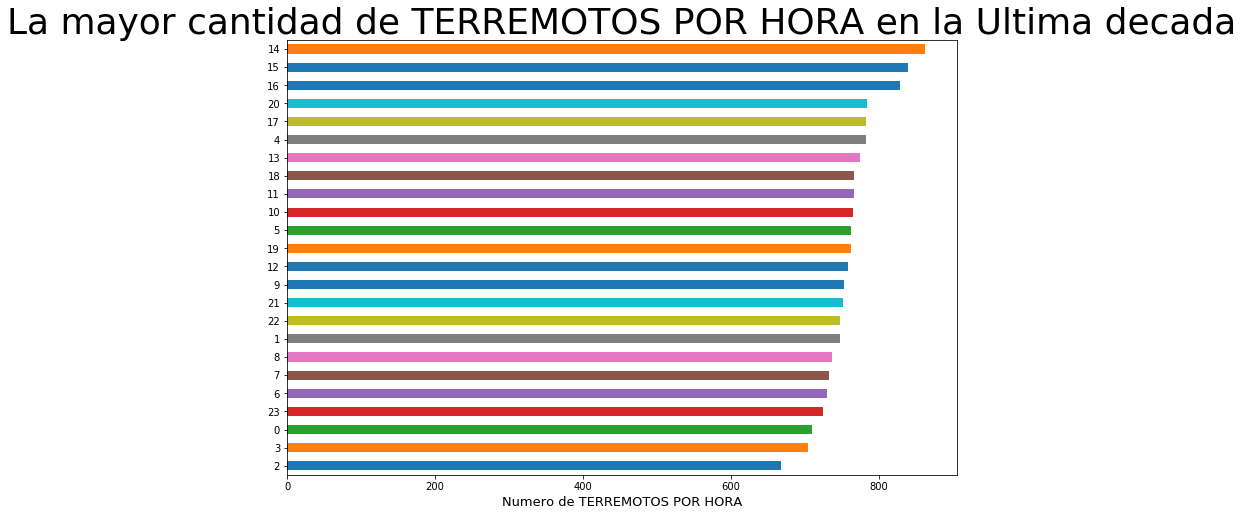

In [50]:
grafico(sismos,"Hora","terremotos por hora")

En la hora que hay mas terremotos es a las 14 hrs, aunque pasa que se dan con mayor frecuencia entre las 14 y 16 hrs. Donde se da menor cantidad los terremotos es a las 2hrs

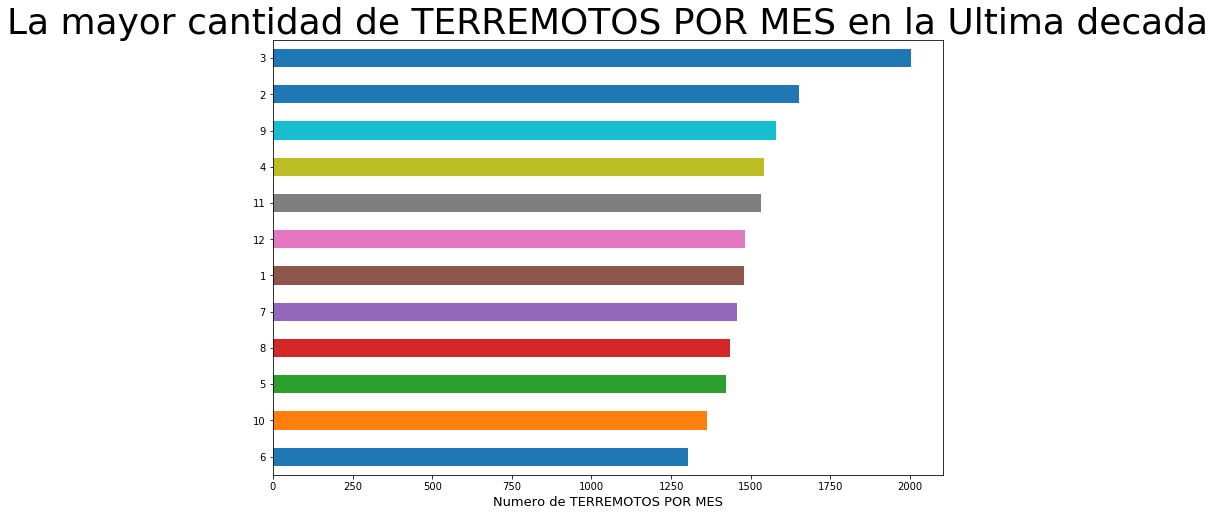

In [51]:
grafico(sismos,"Mes","terremotos por Mes")

Sin lugar a dudas el mes que tiene mayores casos de terremotos en la decada es el mes de MARZO con alrredor de 2000 terremotos y el que menos terremotos tiene es Junio.

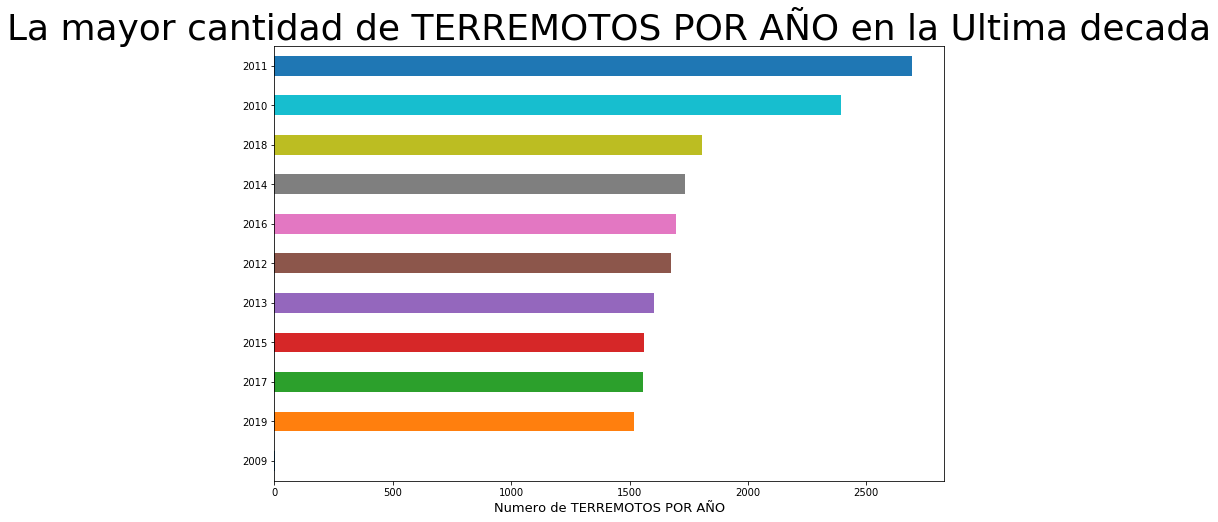

In [52]:
grafico(sismos,"Año","terremotos por año")

En el año 2011 es cuando mas terremotos se producieron en la ultima decada con alrrededor de 2700 casos, lo sigue el año 2010 con alrredor de 2400 casos. Posteriormente lo siguen los años siguientes con casos entre 1500 y 1800 casos aproximadamente. El 2019 es donde menos casos de terremotos se han producido.

# Punto 6 

## Genere un nuevo DataFrame a partir del anterior, manteniendo solo las siguientes columnas:
*code
*mag
*alert
*place
*sig
*tsunami
*title
 
*las 6 columnas construidas en el punto 4.
*las 2 columnas binarias construidas en el punto 5.


In [53]:
sismosf=sismos[['code','mag','alert','place','sig','tsunami','title','Año', 'Mes', 'Dia', 'Hora', 'Minuto','Segundos','sismoCH', 'grado_sismo']]

# Punto 7

## Genere tres DataFrames donde cada uno almacene los sismos de los años 2010, 2015 y 2018 respectivamente. Expórtelos en 3 csv distintos. Nombrelos como “earthquakes_mag6_2010.csv”, “earthquakes_mag6_2015.csv” y “earthquakes_mag6_2018.csv” respectivamente.

Generando nuevas valiables dependiendo del año seleccionado

In [54]:
sismos2010=sismosf[sismosf["Año"]==2010]
sismos2015=sismosf[sismosf["Año"]==2015]
sismos2018=sismosf[sismosf["Año"]==2018]


Guardando en .csv las variables anteriormente hechas. "Index=False" es para que no entregue la nueva columna "Unnamed 0" y la separación le asignamos ";" para no tener problemas posteriores con el traspaso de estos datos a SQL.

In [55]:
sismos2010.to_csv('earthquakes_mag6_2010.csv',index=False,sep=';')
sismos2015.to_csv('earthquakes_mag6_2015.csv',index=False,sep=';')
sismos2018.to_csv('earthquakes_mag6_2018.csv',index=False,sep=';')

# Punto 8

### Generar una nueva base de datos con el siguiente nombre ‘earthquakes_mag6’.

Creamos una nueva base de datos sql llamada ‘earthquakes_mag6’ por medio de la consola

# Punto 9


## Utilizando la librería psycopg2, genere una nueva conexión hacia el motor de PostgreSQL

In [56]:
#Crear una nueva connección
conn = psycopg2.connect("host=localhost dbname=earthquakes_mag6 user=postgres password=calei1234")
#Permite la conección de python con postgresSQL
cur = conn.cursor()

Para revisar el estado de la conección con la base de datos postgresSQL, Si aparece el numero "1" posterior a la ejecucion de la conección, significa que existe conección con la base de datos.

In [57]:
#Revisar el estado de la conección sql
conn.status

1

# Punto 10

## Utilizando la librería psycopg2, cree tres tablas con el nombre de ‘earthquakes_mag6_2010’’, ‘earthquakes_mag6_2015’ y ‘earthquakes_mag6_2018’’ e ingeste los datos con los csv exportados en el punto 6.en esta tabla. Revise la naturaleza de los datos ingestados utilizando dtypes.

In [58]:
#Crear la tabla earthquakes_mag6_2010
cur.execute("""
CREATE TABLE earthquakes_mag6_2010(
    codigo text,
    magnitud float,
    alerta text,
    lugar text,
    senal int,
    tsunami int,
    titulo text,
    ano int,
    mes int,
    dia int,
    hora int,
    minuto int,
    degundos int,
    sismoCH int,
    sismo_sobre6 int);
    
    """)

conn.commit()


#Para exportar los datos 2010 a la tabla
f = open(r'/home/c4e13/Escritorio/proyecto9/earthquakes_mag6_2010.csv', 'r')
next(f)
cur.copy_from(f, 'earthquakes_mag6_2010', sep=';')
f.close()
conn.commit()

In [59]:
#Crear la tabla earthquakes_mag6_2015
cur.execute("""
CREATE TABLE earthquakes_mag6_2015(
    codigo text,
    magnitud float,
    alerta text,
    lugar text,
    senal int,
    tsunami int,
    titulo text,
    ano int,
    mes int,
    dia int,
    hora int,
    minuto int,
    degundos int,
    sismoCH int,
    sismo_sobre6 int);
    
    """)

conn.commit()


#Para exportar los datos 2015 a la tabla
g = open(r'/home/c4e13/Escritorio/proyecto9/earthquakes_mag6_2015.csv', 'r')
next(g)
cur.copy_from(g, 'earthquakes_mag6_2015', sep=';')
g.close()
conn.commit()

In [60]:
#Crear la tabla earthquakes_mag6_2018
cur.execute("""
CREATE TABLE earthquakes_mag6_2018(
    codigo text,
    magnitud float,
    alerta text,
    lugar text,
    senal int,
    tsunami int,
    titulo text,
    ano int,
    mes int,
    dia int,
    hora int,
    minuto int,
    degundos int,
    sismoCH int,
    sismo_sobre6 int);
    
    """)

conn.commit()


#Para exportar los datos 2018 a la tabla
h = open(r'/home/c4e13/Escritorio/proyecto9/earthquakes_mag6_2018.csv', 'r')
next(h)
cur.copy_from(h, 'earthquakes_mag6_2018', sep=';')
h.close()
conn.commit()

In [ ]:
# #Para eliminar una tabla 
# cur.execute("""
# drop TABLE earthquakes_mag6_2018;
# """)

# conn.commit()

# Punto 11

## A través de queries, realice las siguientes consultas SQL

Primero, para realizar las consultas, creamos una función para realizar la coneccion y ejecucion de las preguntas que le nos piden.

In [61]:
# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table
  


Query 1: En la tabla de sismos del año 2010, obtener los eventos igual o mayores a 7 grados donde se muestre lugar, magnitud,  mes, dia. Ordénelos de manera descendente. Identifique el evento con mayor magnitud.

In [62]:
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
query1 = create_pandas_table("""
SELECT lugar, magnitud,  mes, dia 
FROM earthquakes_mag6_2010 WHERE magnitud >=7  
ORDER BY magnitud desc  """)
query1
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()


In [63]:
query1.style.highlight_max("magnitud", color="aqua")

,lugar,magnitud,mes,dia
0,"offshore Bio-Bio, Chile",8.8,2,27
1,"Kepulauan Mentawai region, Indonesia",7.8,10,25
2,"northern Sumatra, Indonesia",7.8,4,6
3,"Moro Gulf, Mindanao, Philippines",7.6,7,23
4,"Moro Gulf, Mindanao, Philippines",7.5,7,23
5,"Nicobar Islands, India region",7.5,6,12
6,"Bonin Islands, Japan region",7.4,12,21
7,"off the coast of Bio-Bio, Chile",7.4,2,27
8,"New Britain region, Papua New Guinea",7.3,7,18
9,Vanuatu region,7.3,12,25


En la query 1 podemos ver que el terremoto del 27 de febrero del 2010 en Bio-Bio, Chile es el terremoto que tiene mayor magnitud con un 8.1 grados.

Query 2: Identifique los sismos de igual magnitud que se hayan producido tanto en el año 2015 como en el año 2018. 

In [64]:
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
query2 = create_pandas_table(
    """SELECT * FROM earthquakes_mag6_2015 
    JOIN earthquakes_mag6_2018 ON earthquakes_mag6_2015.lugar=earthquakes_mag6_2018.lugar
    WHERE earthquakes_mag6_2015.magnitud = earthquakes_mag6_2018.magnitud 
    """
)
query2
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()

In [65]:
query2

,codigo,magnitud,alerta,lugar,senal,tsunami,titulo,ano,mes,dia,...,tsunami,titulo,ano,mes,dia,hora,minuto,degundos,sismoch,sismo_sobre6
0,c000tbns,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,1,4,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
1,1000328v,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,8,14,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
2,20003pjr,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,9,27,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
3,20003pk2,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,9,27,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
4,20003pl2,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,9,27,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
5,10003jzd,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,10,3,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
6,10004933,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,12,23,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
7,20002mwk,5.1,,Carlsberg Ridge,400,0,M 5.1 - Carlsberg Ridge,2015,6,8,...,0,M 5.1 - Carlsberg Ridge,2018,12,30,21,29,32,0,0
8,10001lvy,5.0,,Central Mid-Atlantic Ridge,385,0,M 5.0 - Central Mid-Atlantic Ridge,2015,3,12,...,0,M 5.0 - Central Mid-Atlantic Ridge,2018,12,21,17,10,57,0,0
9,10002zye,5.0,,Central Mid-Atlantic Ridge,385,0,M 5.0 - Central Mid-Atlantic Ridge,2015,8,6,...,0,M 5.0 - Central Mid-Atlantic Ridge,2018,12,21,17,10,57,0,0


Al unir los csv del 2015 y 2018 obtenemos una coincidencia entre sismos de igual magnitud en 245 filas entre las lineas unidas a traves del "ID" de lugar. Si no se unian a travez de un "ID" se comparaba linea por linea del primer cvs con todas las lienas del segundo, lo que generaba una cantidad inmensa de duplicados.

Query 3: Identifique los sismos que se han producido tanto en el año 2015 y 2018 y que tenga como alerta 'red'.

In [66]:
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
query3 = create_pandas_table(
    """SELECT *
    FROM earthquakes_mag6_2015 
    JOIN earthquakes_mag6_2018 ON earthquakes_mag6_2015.alerta=earthquakes_mag6_2018.alerta
    WHERE earthquakes_mag6_2018.alerta='red' 
    """
)
query3
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()

In [67]:
query3

,codigo,magnitud,alerta,lugar,senal,tsunami,titulo,ano,mes,dia,...,tsunami,titulo,ano,mes,dia,hora,minuto,degundos,sismoch,sismo_sobre6
0,20002926,7.8,red,"36km E of Khudi, Nepal",2820,0,"M 7.8 - 36km E of Khudi, Nepal",2015,4,25,...,1,"M 7.5 - 70km N of Palu, Indonesia",2018,9,28,7,2,45,0,1
1,20002926,7.8,red,"36km E of Khudi, Nepal",2820,0,"M 7.8 - 36km E of Khudi, Nepal",2015,4,25,...,0,"M 5.5 - 1km NW of Hirakata, Japan",2018,6,17,18,58,34,0,0


En la query 3 nos entrega 3 paises con alerta roja en 2015 y 2018, estos son: Japan, Indonesia, Nepal.

Query 4: Identifique los sismos producidos el año 2018 con una magnitud sobre del 7 y riesgo de tsunami.

In [68]:
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
query4 = create_pandas_table("""SELECT * 
FROM earthquakes_mag6_2018 
WHERE magnitud >7 AND tsunami=1
""")
query4
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()


In [69]:
query4

,codigo,magnitud,alerta,lugar,senal,tsunami,titulo,ano,mes,dia,hora,minuto,degundos,sismoch,sismo_sobre6
0,2000ivfw,7.3,green,"83km W of Nikol'skoye, Russia",822,1,"M 7.3 - 83km W of Nikol'skoye, Russia",2018,12,20,14,1,55,0,1
1,2000isc8,7.1,green,"54km N of Bristol Island, South Sandwich Islands",776,1,"M 7.1 - 54km N of Bristol Island, South Sandwi...",2018,12,10,23,26,29,0,1
2,1000i2gt,7.5,green,"165km ESE of Tadine, New Caledonia",871,1,"M 7.5 - 165km ESE of Tadine, New Caledonia",2018,12,5,1,18,8,0,1
3,018fcnsk91,7.1,orange,"14km NNW of Anchorage, Alaska",1760,1,"M 7.1 - 14km NNW of Anchorage, Alaska",2018,11,30,14,29,29,0,1
4,1000h3p4,7.5,red,"70km N of Palu, Indonesia",2028,1,"M 7.5 - 70km N of Palu, Indonesia",2018,9,28,7,2,45,0,1
5,2000h9e2,7.9,green,"102km ESE of Suva, Fiji",978,1,"M 7.9 - 102km ESE of Suva, Fiji",2018,9,6,12,49,18,0,1
6,1000gjaz,7.1,green,"202km WNW of Ile Hunter, New Caledonia",776,1,"M 7.1 - 202km WNW of Ile Hunter, New Caledonia",2018,8,29,0,51,56,0,1
7,1000gez7,7.3,yellow,"24km ENE of Rio Caribe, Venezuela",1580,1,"M 7.3 - 24km ENE of Rio Caribe, Venezuela",2018,8,21,18,31,47,0,1
8,1000gcii,8.2,green,"286km NNE of Ndoi Island, Fiji",1045,1,"M 8.2 - 286km NNE of Ndoi Island, Fiji",2018,8,18,21,19,40,0,1
9,2000d7q6,7.5,yellow,"83km SW of Porgera, Papua New Guinea",943,1,"M 7.5 - 83km SW of Porgera, Papua New Guinea",2018,2,25,14,44,44,0,1


En la query4 nos muestra 14 registros donde la magnitud del terremoto es superior a 7 grados y con alerta de tsunami 1, aunque no se aprecia el terremoto de Chile en 2010.

In [70]:
#Para cerrar la conección con postgresSQL
conn.close()

# Parte 12, Bonus

## Obtenga nuevos datos de la API, considerando todos los sismos ocurridos entre el 1 de Enero del 1970 y el día 5 de Diciembre del 2019, que tengan una magnitud mínima de 5.5 grados. Restrinja además la solicitud de datos a aquellos eventos que se encuentren en longitudes entre -100 y -50 grados y en latitudes entre -55 y 20 grados.

In [71]:
#Generamos la pregunta
origenbonus = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1970-01-01&endtime=2019-12-05&minmag=5.5&minlatitude=-55&maxlatitude=20&minlongitude=-100&maxlongitude=-50"
#obtenemos una respuesta
respuestabonus = urllib.request.urlopen(origenbonus)
#cargamos la respuesta en una variable tipo diccionario con json
terremotosbonus = json.loads(respuestabonus.read())

In [72]:
#Normalizamos los datos
sismosbonus= json_normalize(terremotosbonus ["features"])

In [73]:
sismosbonus.head()

,geometry.coordinates,geometry.type,id,properties.alert,properties.cdi,properties.code,properties.detail,properties.dmin,properties.felt,properties.gap,...,properties.status,properties.time,properties.title,properties.tsunami,properties.type,properties.types,properties.tz,properties.updated,properties.url,type
0,"[-70.6504, -18.5597, 32.44]",Point,us70006fh7,green,4.4,70006fh7,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.310,58.0,112.0,...,reviewed,1575362796374,"M 6.0 - 37km WSW of Arica, Chile",0,earthquake,",dyfi,geoserve,ground-failure,losspager,moment...",-300.0,1575533249617,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
1,"[-91.8586, 13.9284, 47.61]",Point,us70006eqm,green,4.7,70006eqm,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.613,28.0,159.0,...,reviewed,1575099865049,"M 5.6 - 41km S of Champerico, Guatemala",0,earthquake,",dyfi,geoserve,losspager,moment-tensor,origin,...",-360.0,1576447463457,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
2,"[-93.2133, 13.8855, 14.16]",Point,us70006a6q,green,5.5,70006a6q,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.369,76.0,56.0,...,reviewed,1574224025120,"M 6.3 - 125km SW of Puerto Madero, Mexico",0,earthquake,",dyfi,geoserve,ground-failure,losspager,moment...",-360.0,1575931091730,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
3,"[-66.8723, -33.6399, 10]",Point,us70006a4q,green,4.5,70006a4q,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.333,87.0,21.0,...,reviewed,1574205040570,"M 5.7 - 62km SW of San Luis, Argentina",0,earthquake,",dyfi,geoserve,losspager,moment-tensor,origin,...",-180.0,1575334177696,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
4,"[-90.9101, 13.6915, 58.36]",Point,us60006b3s,green,5.4,60006b3s,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.125,147.0,48.0,...,reviewed,1573662534164,"M 5.5 - 27km SSW of Puerto San Jose, Guatemala",0,earthquake,",dyfi,geoserve,losspager,moment-tensor,origin,...",-360.0,1574904579511,https://earthquake.usgs.gov/earthquakes/eventp...,Feature


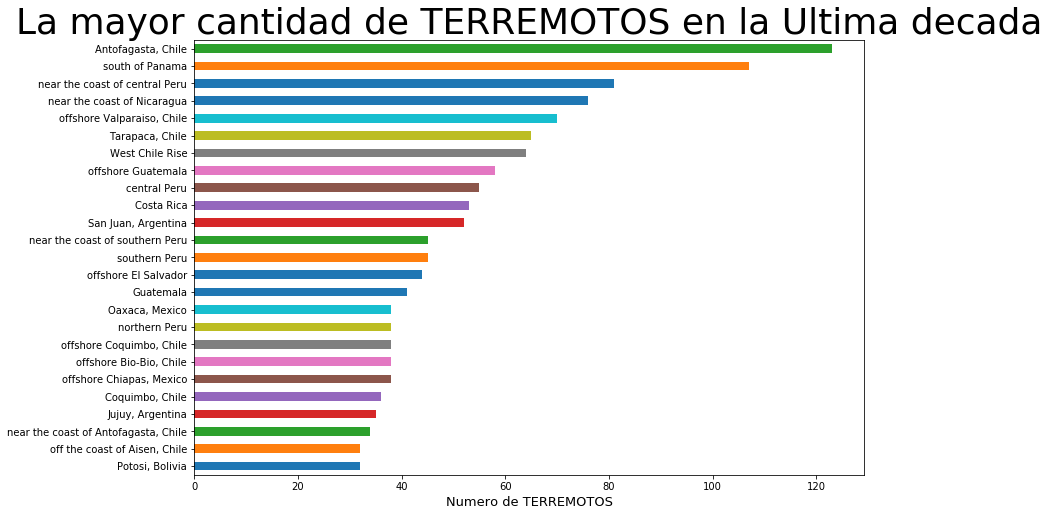

In [74]:
grafico (sismosbonus,'properties.place',"terremotos")

El lugar en sudamerica con mas terremotos en la ultima decada, es en Antofagasta Chile con alrredodr de 120 terremotos. La que tiene menos frecuencia de las top 25 en la decada es Potosi en bolivia con poco mas de 30 terremotos 

## Bonus parte 2

In [75]:
#Genera una lista del dataframe con cada uno de los datos de la columna properties.time del ciclo for con datetime. 
tiempobonus = []
for x in sismosbonus["properties.time"]:
    when = datetime.datetime.fromtimestamp(
        x / 1000).strftime('%Y%z')
    tiempobonus.append("{0}".format(when))

In [76]:
#Pasamos la lista a dataframe y posteriormente convertimos a entero el año ya que se encuentra en formato string
tiempobonus=pd.DataFrame(tiempobonus, columns={"Año"})
tiempobonus['Año'] = tiempobonus['Año'].astype(int)

In [77]:
#Para unir las columnas creadas de fechas y horas
sismosbo = pd.concat([sismosbonus, tiempobonus], axis=1)

2019

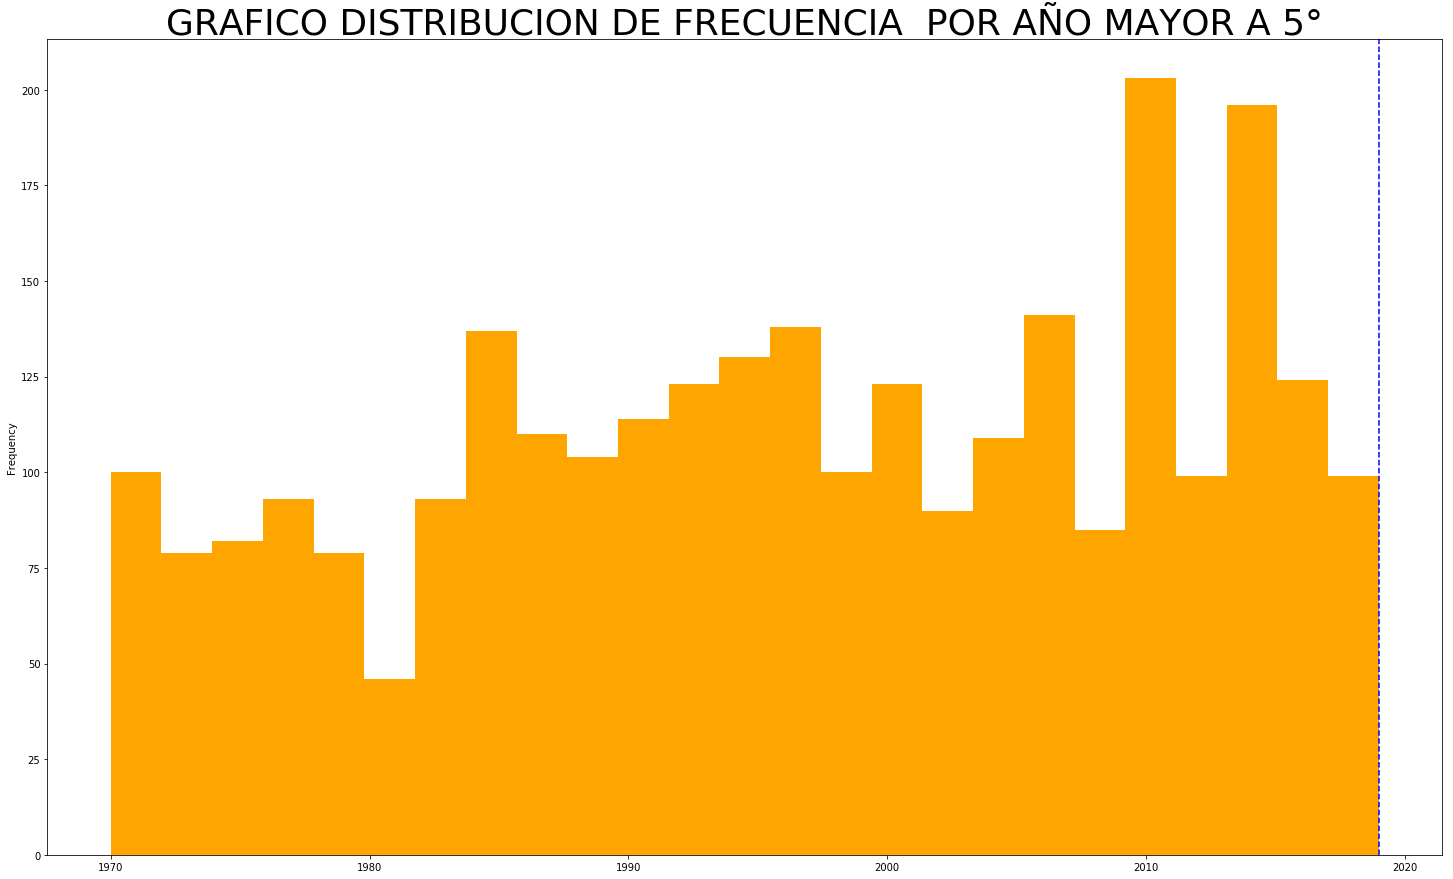

In [78]:
histograma (sismosbo,"Año", " por Año mayor a 5°",25)

En el histograma con un bins de 25 podemos ver que año 1980 es donde hubo una menor frecuencia de terremotos con alrrededor de 50, en cambio en el año 2010 es el maximo fue cercano a 200. Del año 2000 al 2019 en adelante han sido mucho mas variables las frecuencias de terremotos. La linea azul en este caso no representa nada.